In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
data_to_load = files.upload()

Saving Golden_Ticket_Award_Winners_Steel.csv to Golden_Ticket_Award_Winners_Steel.csv
Saving Golden_Ticket_Award_Winners_Wood.csv to Golden_Ticket_Award_Winners_Wood.csv


In [5]:
import io
wood = pd.read_csv(io.BytesIO(data_to_load['Golden_Ticket_Award_Winners_Wood.csv']))
print(wood.head(5))
steel = pd.read_csv(io.BytesIO(data_to_load['Golden_Ticket_Award_Winners_Steel.csv']))

   Rank          Name  ... Points Year of Rank
0     1  Boulder Dash  ...   1333         2013
1     2       El Toro  ...   1302         2013
2     3       Phoenix  ...   1088         2013
3     4    The Voyage  ...   1086         2013
4     5   Thunderhead  ...    923         2013

[5 rows x 8 columns]


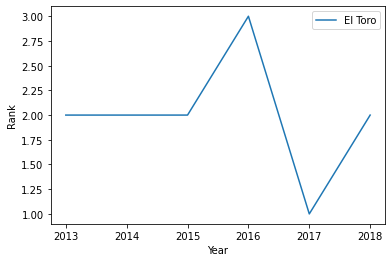

In [6]:
#Function to plot rankings over time for a roller coaster:
def rank_year(name, park):
  dfwood = wood[(wood['Name'] == name) & (wood['Park'] == park)]
  plt.plot(dfwood['Year of Rank'], dfwood['Rank'])
  plt.ylabel('Rank')
  plt.xlabel('Year')
  plt.legend([name], loc = 1)
  plt.show()

rank_year('El Toro', 'Six Flags Great Adventure')

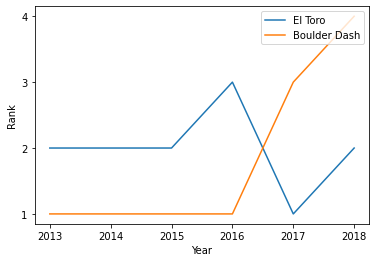

In [7]:
#Function to plot rankings over time for 2 roller coasters:
def rank_year2(name1, park1, name2,park2):
  dfwood1 = wood[(wood['Name'] == name1) & (wood['Park'] == park1)]
  dfwood2 = wood[(wood['Name'] == name2) & (wood['Park'] == park2)]
  ay= plt.subplot()
  plt.plot(dfwood1['Year of Rank'], dfwood1['Rank'])
  plt.plot(dfwood2['Year of Rank'], dfwood2['Rank'])
  plt.ylabel('Rank')
  plt.xlabel('Year')
  plt.legend([name1,name2], loc = 1)
  ay.set_yticks([1, 2, 3, 4])
  plt.show()

rank_year2('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce')

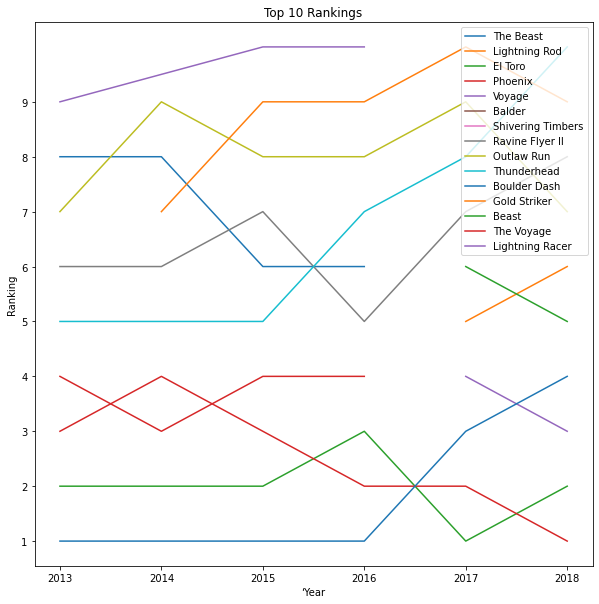

In [8]:
#Function to plot top ranked roller coasters:
def top_ranked(df,n):
  top = df[df['Rank'] <= n]
  fig, ax = plt.subplots(figsize=(10,10))
  for coaster in set(top['Name']):
    coaster_rankings = top[top['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
    ax.set_yticks([i for i in range(1,10)])

  plt.title('Top 10 Rankings')
  plt.xlabel('‘Year')
  plt.ylabel('Ranking')
  plt.legend(loc=1)
  plt.show()

top_ranked(wood, 10)

In [9]:
#Load roller coaster data 
data_to_load = files.upload()

roller_coasters = pd.read_csv(io.BytesIO(data_to_load['roller_coasters.csv']))

Saving roller_coasters.csv to roller_coasters.csv


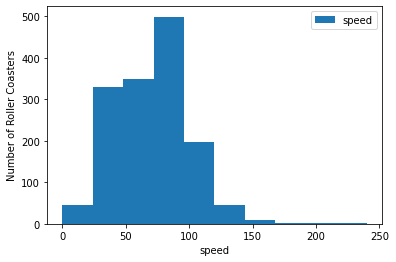

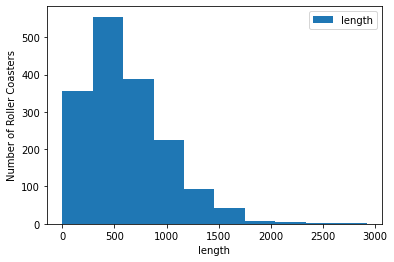

In [10]:
#Function to plot histogram of column values:
def roller_coaster_info(df, column):
  plt.hist(df[column])
  legend = [column]
  plt.legend(legend)
  plt.xlabel(column)
  plt.ylabel('Number of Roller Coasters')
  plt.show()

roller_coaster_info(roller_coasters,'speed')
roller_coaster_info(roller_coasters,'length')

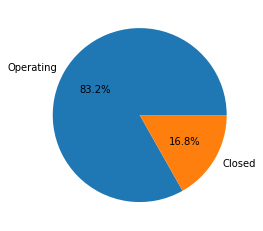

In [14]:
#unction that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely')
def pie_chart(df):
  operating_coasters = df[df['status'] == 'status.operating']
  closed_coasters = df[df['status'] == 'status.closed.definitely']
  count = [len(operating_coasters), len(closed_coasters)]
  plt.pie(count, autopct='%0.1f%%', labels=['Operating','Closed'])
  plt.show

pie_chart(roller_coasters)

ValueError: ignored

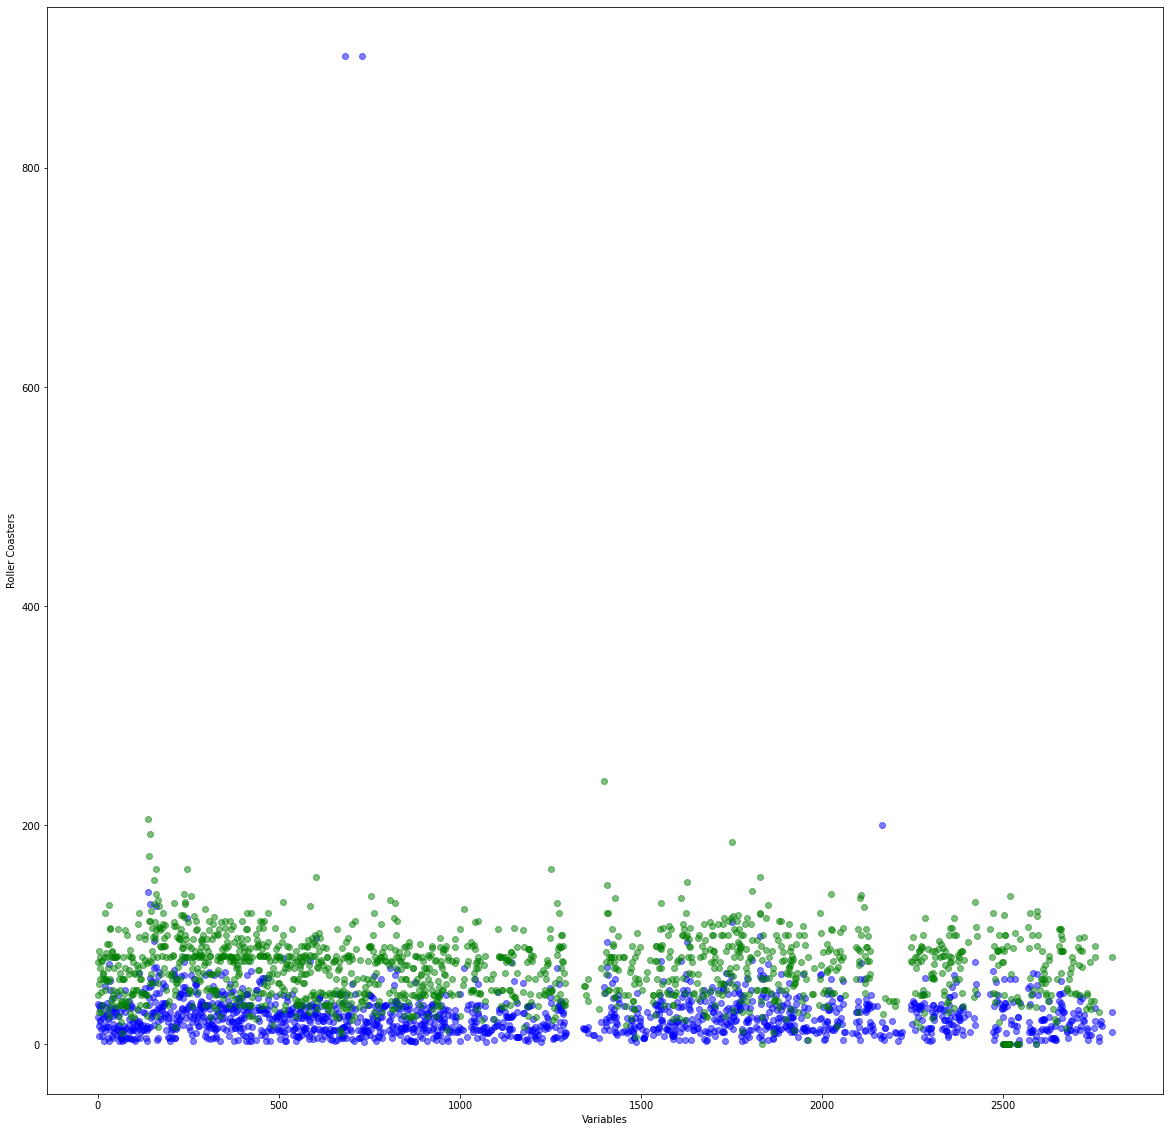

In [34]:
#Function that creates a scatter plot of two numeric columns of the roller coaster DataFrame.
def scatter(df, column1, column2):
  c1 = df[column1]
  c2 = df[column2]
  x = range(len(df))
  plt.figure(figsize=(10, 10))
  ax = plt.subplot()
  plt.scatter(x, c1, color= 'blue', alpha= 0.5)
  plt.scatter(x, c2, color= 'green', alpha=0.5)
  ax.set_xlabel('Variables')
  ax.set_ylabel('Roller Coasters')
  plt.ylim(0, 100)
  plt.legend([column1, column2])
  plt.show()

scatterplot(roller_coasters,'height', 'speed')